In [ ]:
fimport rasterio 
from rasterio.merge import merge
import rasterio.plot
from rasterio.windows import Window
from rasterio.plot import show
import glob
from osgeo import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tables
import tqdm
# from osgeo import gdal
project_id = 'moja-328209'
!gcloud config set project {project_id}
!gsutil ls
np.seterr(divide='ignore', invalid='ignore')

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey

gs://data-myanmar-new/
gs://data-philippines-new/
gs://data-uganda/
gs://philippines-backup-new/


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Changing resolution of data which is relevant


In [ ]:
from rasterio.enums import Resampling
def resample_raster(input_path, output_path, targetPixelSizeX = 0.003, targetPixelSizeY = 0.003):
    raster = rasterio.open(input_path)
    t = raster.transform

    pixelSizeX = t[0]
    pixelSizeY =-t[4]
    print(pixelSizeX, pixelSizeY)
    scalingFactorX = (targetPixelSizeX / pixelSizeX)
    scalingFactorY = (targetPixelSizeY / pixelSizeY)

    sizeX = raster.shape[0]
    sizeY = raster.shape[1]

    targetSizeX = int(sizeX / scalingFactorX)
    targetSizeY = int(sizeY / scalingFactorY)
    print(targetSizeX, targetSizeY)

    scale = scalingFactorX
    assert (scalingFactorX == scalingFactorY)

    # rescale the metadata
    transform = rasterio.Affine(t.a * scale, t.b, t.c, t.d, t.e * scale, t.f)  # <== multiplication
    height = int(raster.height // scale)                              # <== division
    width = int(raster.width // scale)
    print(height, width)

    profile = raster.profile
    profile.update(transform=transform, driver='GTiff', height=height, width=width, crs=raster.crs)
    print(profile)

    data = raster.read( # Note changed order of indexes, arrays are band, row, col order not row, col, band
            out_shape=(int(raster.count), int(height), int(width)),
            resampling=Resampling.cubic)

    with rasterio.open(output_path,'w', **profile) as dst:
        dst.write(data)

    print("Completed rewriting, now checking values:")
    resampled = rasterio.open(output_path)
    print('Orig dims: {}, New dims: {}'.format(raster.shape, resampled.shape))

from rasterio.enums import Resampling

def resampleRasterforNonSquare(input_path, output_path, targetPixelSizeX = 0.003, targetPixelSizeY = 0.003):
    raster = rasterio.open(input_path)
    t = raster.transform

    pixelSizeX = t[0]
    pixelSizeY =-t[4]
    print(pixelSizeX, pixelSizeY)
    scalingFactorX = (targetPixelSizeX / pixelSizeX)
    scalingFactorY = (targetPixelSizeY / pixelSizeY)

    sizeX = raster.shape[0]
    sizeY = raster.shape[1]

    targetSizeX = int(sizeX / scalingFactorX)
    targetSizeY = int(sizeY / scalingFactorY)
    print(targetSizeX, targetSizeY)

    scale = scalingFactorX

    # assert (scalingFactorX == scalingFactorY)

    # rescale the metadata
    transform = rasterio.Affine(t.a * scalingFactorX, t.b, t.c, t.d, t.e * scalingFactorY, t.f)  # <== multiplication
    height = int(raster.height // scalingFactorX)                              # <== division
    width = int(raster.width // scalingFactorY)
    print(height, width)

    profile = raster.profile
    profile.update(transform=transform, driver='GTiff', height=height, width=width, crs=raster.crs)
    print(profile)

    data = raster.read( # Note changed order of indexes, arrays are band, row, col order not row, col, band
            out_shape=(int(raster.count), int(height), int(width)),
            resampling=Resampling.cubic)

    with rasterio.open(output_path,'w', **profile) as dst:
        dst.write(data)

    print("Completed rewriting, now checking values:")
    resampled = rasterio.open(output_path)
    print('Orig dims: {}, New dims: {}'.format(raster.shape, resampled.shape))

In [ ]:
#changing resolution of files after year 2000 only as matt hansen is available for that only
landsat_tifs = glob.glob("/data/uganda/budongo/2*.tif")
print(landsat_tifs)
for file in landsat_tifs:
  output_path = file[:-4] + "_resampled.tif"
  print(output_path)
  resample_raster(file, output_path)

['/data/uganda/budongo/2011.tif', '/data/uganda/budongo/2018.tif', '/data/uganda/budongo/2009.tif', '/data/uganda/budongo/2020.tif', '/data/uganda/budongo/2007.tif', '/data/uganda/budongo/2016.tif', '/data/uganda/budongo/2012.tif', '/data/uganda/budongo/2001.tif', '/data/uganda/budongo/2000.tif', '/data/uganda/budongo/2003.tif', '/data/uganda/budongo/2002.tif', '/data/uganda/budongo/2015.tif', '/data/uganda/budongo/2004.tif', '/data/uganda/budongo/2013.tif', '/data/uganda/budongo/2017.tif', '/data/uganda/budongo/2008.tif', '/data/uganda/budongo/2010.tif', '/data/uganda/budongo/2019.tif', '/data/uganda/budongo/2006.tif', '/data/uganda/budongo/2014.tif', '/data/uganda/budongo/2005.tif']
/data/uganda/budongo/2011_resampled.tif
0.00026949458523585647 0.00026949458523585647
643 643
643 643
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 643, 'height': 643, 'count': 11, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.003, 0.0, 31.29990961304808,
       0.0, -0.003, 3.84703

In [ ]:
#changing resolution of files after year 2000 only as matt hansen is available for that only
landsat_tifs = glob.glob("/data/uganda/budongo/matt_hansen/*.tif")
print(landsat_tifs)
for file in landsat_tifs:
  output_path = file[:-4] + "_resampled.tif"
  print(output_path)
  resampleRasterforNonSquare(file, output_path)

['/data/uganda/budongo/matt_hansen/2011.tif', '/data/uganda/budongo/matt_hansen/2018.tif', '/data/uganda/budongo/matt_hansen/2009.tif', '/data/uganda/budongo/matt_hansen/2020.tif', '/data/uganda/budongo/matt_hansen/2007.tif', '/data/uganda/budongo/matt_hansen/2016.tif', '/data/uganda/budongo/matt_hansen/2012.tif', '/data/uganda/budongo/matt_hansen/2001.tif', '/data/uganda/budongo/matt_hansen/2003.tif', '/data/uganda/budongo/matt_hansen/2002.tif', '/data/uganda/budongo/matt_hansen/2015.tif', '/data/uganda/budongo/matt_hansen/2004.tif', '/data/uganda/budongo/matt_hansen/2013.tif', '/data/uganda/budongo/matt_hansen/2017.tif', '/data/uganda/budongo/matt_hansen/2008.tif', '/data/uganda/budongo/matt_hansen/2010.tif', '/data/uganda/budongo/matt_hansen/2019.tif', '/data/uganda/budongo/matt_hansen/2006.tif', '/data/uganda/budongo/matt_hansen/2014.tif', '/data/uganda/budongo/matt_hansen/2005.tif']
/data/uganda/budongo/matt_hansen/2011_resampled.tif
0.0002694945870535715 0.00026949458705357145
64

In [ ]:
  resampleRasterforNonSquare("/data/uganda/budongo/matt_hansen_clipped.tif","/data/uganda/budongo/matt_hansen_clipped_resampled.tif")

NameError: ignored

# Checking and correcting for Nan values

### For GEE data

In [ ]:
for year in range(2001,2021):
  src = rasterio.open('/data/uganda/budongo/{}.tif'.format(year))
  X = src.read()
  isnull=0
  for i in range(0, 11):
    isnull+=np.isnan(X[i,:,:]).sum()

  print(year,":",isnull,"\tShape:",X.shape)
  src.close()
  del X


2001 : 67364 	Shape: (11, 7168, 7168)
2002 : 67364 	Shape: (11, 7168, 7168)
2003 : 67364 	Shape: (11, 7168, 7168)
2004 : 67364 	Shape: (11, 7168, 7168)
2005 : 67364 	Shape: (11, 7168, 7168)
2006 : 67364 	Shape: (11, 7168, 7168)
2007 : 67364 	Shape: (11, 7168, 7168)
2008 : 67364 	Shape: (11, 7168, 7168)
2009 : 67364 	Shape: (11, 7168, 7168)
2010 : 67364 	Shape: (11, 7168, 7168)
2011 : 67364 	Shape: (11, 7168, 7168)
2012 : 67364 	Shape: (11, 7168, 7168)
2013 : 67364 	Shape: (11, 7168, 7168)
2014 : 67364 	Shape: (11, 7168, 7168)
2015 : 67364 	Shape: (11, 7168, 7168)
2016 : 67364 	Shape: (11, 7168, 7168)
2017 : 67364 	Shape: (11, 7168, 7168)
2018 : 67364 	Shape: (11, 7168, 7168)
2019 : 67364 	Shape: (11, 7168, 7168)
2020 : 67364 	Shape: (11, 7168, 7168)


In [ ]:
src=rasterio.open("/data/uganda/budongo/2000.tif")
show(src)

TypeError: ignored

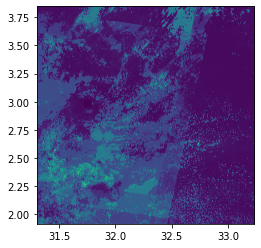

<AxesSubplot:>

In [ ]:
src=rasterio.open("/data/uganda/budongo/corrected/2000.tif")
show(src)

In [ ]:
for year in range(2000,2021):
  print("Starting with ", year)
  src_curr = rasterio.open('/data/uganda/budongo/{}.tif'.format(year))

  modified_year_data = []
  for band in range(1,12):
    curr = pd.DataFrame(src_curr.read(band))
    print("Working on band: ", band,"  no. of null: ",curr.isna().sum().sum(),  "mean: ",curr.mean().mean())
    curr = curr.fillna(curr.mean())
    modified_year_data.append(curr)
    del curr
  
  

  with rasterio.Env():
      profile = src_curr.profile
      with rasterio.open('/data/uganda/budongo/corrected/{}.tif'.format(year), 'w', **profile) as dst:
        for band in range(1,12):
          dst.write(modified_year_data[band-1][:][:].astype(rasterio.float64), band)

  src_curr.close()

  print("Shape of modified year df: ", np.shape(modified_year_data))


Starting with  2000
Working on band:  1   no. of null:  6124 mean:  2473.8572025361345
Working on band:  2   no. of null:  6124 mean:  2352.612134715135
Working on band:  3   no. of null:  6124 mean:  2508.5647422887782
Working on band:  4   no. of null:  6124 mean:  3011.4935633694245
Working on band:  5   no. of null:  6124 mean:  2621.9813278640627
Working on band:  6   no. of null:  6124 mean:  2908.8980263507883
Working on band:  7   no. of null:  6124 mean:  1568.3315991486286
Working on band:  8   no. of null:  6124 mean:  98.82682859822641
Working on band:  9   no. of null:  6124 mean:  3.7298392030099055
Working on band:  10   no. of null:  6124 mean:  106.92296733136125
Working on band:  11   no. of null:  6124 mean:  2.098473197431262
Shape of modified year df:  (11, 7168, 7168)
Starting with  2001
Working on band:  1   no. of null:  6124 mean:  1989.048832145197
Working on band:  2   no. of null:  6124 mean:  1910.1834583009659
Working on band:  3   no. of null:  6124 mean:

(11, 7168, 7168)
0.0
7244.5
2905.1567998333685
119.02212807714766


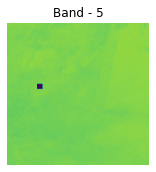

In [ ]:
year = 2000
src = rasterio.open('/data/uganda/budongo/corrected/{}.tif'.format(year))
X = np.asarray(src.read())
print(X.shape)
fig = plt.figure(figsize = (32, 12))
for i in range(5, 6):
  fig.add_subplot(4, 4, i+1)
  print(X[i,:,:].min())
  print(X[i,:,:].max())
  print(X[i,:,:].mean())
  print(X[i,:,:].std())
  plt.imshow(X[i,:,:], vmin=np.min(X[i,:,:]), vmax=np.max(X[i,:,:])/2)
  plt.axis('off')
  plt.title(f'Band - {i}')
del X
src.close()


(11, 7168, 7168)
nan
nan
nan
6124


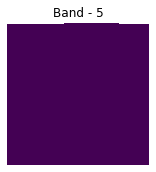

In [ ]:
year = 2000
src = rasterio.open('/data/uganda/budongo/{}.tif'.format(year))
X = np.asarray(src.read())
print(X.shape)
fig = plt.figure(figsize = (32, 12))
for i in range(5, 6):
  fig.add_subplot(4, 4, i+1)
  print(np.min(X[i,:,:]))
  print(np.max(X[i,:,:]))
  print(np.mean(X[i,:,:]))
  print(np.isnan(X[i,:,:]).sum())
  plt.imshow(X[i,:,:], vmin=np.min(X[i,:,:]), vmax=np.max(X[i,:,:]))
  plt.axis('off')
  plt.title(f'Band - {i}')
del X
src.close()


In [ ]:
year = 2019
src = rasterio.open('/data/uganda/budongo/corrected/{}.tif'.format(year))
X = np.asarray(src.read())
print(X.shape)
fig = plt.figure(figsize = (32, 12))
for i in range(0, 11):
  fig.add_subplot(4, 4, i+1)
  plt.imshow(X[i,:,:], vmin=np.min(X[i,:,:]), vmax=np.max(X[i,:,:]))
  plt.axis('off')
  plt.title(f'Band - {i}')
del X
src.close()


(11, 7168, 7168)


In [ ]:
for year in range(2000,2021):
  src = rasterio.open('/data/uganda/budongo/{}.tif'.format(year))
  X = src.read()
  isnull=0
  for i in range(0, 11):
    isnull+=np.isnan(X[i,:,:]).sum()
    print("Missing values in band", i, ": ",np.isnan(X[i,:,:]).sum())

  print(year,":",isnull,"\tShape:",X.shape)
  src.close()
  del X


Missing values in band 0 :  6124
Missing values in band 1 :  6124
Missing values in band 2 :  6124
Missing values in band 3 :  6124
Missing values in band 4 :  6124
Missing values in band 5 :  6124
Missing values in band 6 :  6124
Missing values in band 7 :  6124
Missing values in band 8 :  6124
Missing values in band 9 :  6124
Missing values in band 10 :  6124
2000 : 67364 	Shape: (11, 7168, 7168)


KeyboardInterrupt: ignored

### For matt hansen

In [ ]:
for year in range(2000,2021):
  src = rasterio.open('/data/uganda/budongo/matt/{}.tif'.format(year))
  X = src.read()
  isnull=0
  isnull+=np.isnan(X[0,:,:]).sum()

  print(year,":",isnull,"\tShape:",X.shape)
  src.close()
  del X


In [ ]:
print("        Band \t Max \t Min \t Mean \t Std \t #Nan \n")
for year in range(2001,2021):
  print(year)
  src = rasterio.open('/data/uganda/budongo/matt_hansen/{}.tif'.format(year))
  X = src.read()

  
  for i in range(0, 1):
      print("Before: ",i, "\t", X[i,:,:].max(), "\t",  X[i,:,:].min(), "\t",  X[i,:,:].mean(), "\t", X[i,:,:].std(), "\t",  np.isnan(X[i,:,:]).sum())
  src = rasterio.open('/data/uganda/budongo/matt_hansen/{}_resampled.tif'.format(year))
  X = src.read()

  for i in range(0, 1):
      print("After:  ",i, "\t", X[i,:,:].max(), "\t",  X[i,:,:].min(), "\t",  X[i,:,:].mean(), "\t", X[i,:,:].std(), "\t",  np.isnan(X[i,:,:]).sum())

        Band 	 Max 	 Min 	 Mean 	 Std 	 #Nan 

2001
Before:  0 	 1.0 	 0.0 	 0.0005825782308773119 	 0.02412962563908192 	 0
After:   0 	 0.6792041659355164 	 -0.021987108513712883 	 0.0005826612914421885 	 0.006357803806295135 	 0
2002
Before:  0 	 1.0 	 0.0 	 0.000290442486198581 	 0.01703989816169034 	 0
After:   0 	 0.43080225586891174 	 -0.023701973259449005 	 0.0002903300205730149 	 0.0039366880259824695 	 0
2003
Before:  0 	 1.0 	 0.0 	 0.0005673194418148119 	 0.02381171120406394 	 0
After:   0 	 0.7512161135673523 	 -0.032833829522132874 	 0.0005676842119837735 	 0.008175505185811791 	 0
2004
Before:  0 	 1.0 	 0.0 	 0.00046292129828005423 	 0.021510625331488294 	 0
After:   0 	 0.6369609236717224 	 -0.03152361884713173 	 0.0004631943025121773 	 0.005718170092701896 	 0
2005
Before:  0 	 1.0 	 0.0 	 0.000633765240104831 	 0.025166715751667828 	 0
After:   0 	 0.7627464532852173 	 -0.038710881024599075 	 0.0006336193887008693 	 0.009008476323480114 	 0
2006
Before:  0 	 1.0 	 0.

Some details to avoid confusion
- /data/uganda/budongo/{year}.tif contains the original 30*30 resolution data originally downloaded from GEE
- /data/uganda/budongo/matt_hansen/{year}.tif contains the original 30*30 resolution matt_hansen(global forest watch) data originally downloaded from GEE
- /data/uganda/budongo/{year}_resampled.tif contains the changed resolution data
- /data/uganda/budongo/matt_hansen/{year}_resample.tif contains the changed resolution matt_hansen(global forest watch) data
- /data/uganda/budongo/corrected/{year}.tif contains the changed resolution data with NaN values removed


# Creating h5 timeseries

In [ ]:
print("        Band \t Max \t Min \t Mean \t Std \t #Nan \n")
for year in range(2001,2021):
  print(year)
  src = rasterio.open('/data/uganda/budongo/{}.tif'.format(year))
  X = src.read()

  
  for i in range(0, 1):
      print("Before: ",i, "\t", X[i,:,:].max(), "\t",  X[i,:,:].min(), "\t",  X[i,:,:].mean(), "\t", X[i,:,:].std(), "\t",  np.isnan(X[i,:,:]).sum())
  src = rasterio.open('/data/uganda/budongo/{}_resampled.tif'.format(year))
  X = src.read()

  for i in range(0, 1):
      print("After:  ",i, "\t", X[i,:,:].max(), "\t",  X[i,:,:].min(), "\t",  X[i,:,:].mean(), "\t", X[i,:,:].std(), "\t",  np.isnan(X[i,:,:]).sum())

        Band 	 Max 	 Min 	 Mean 	 Std 	 #Nan 

2001
Before:  0 	 nan 	 nan 	 nan 	 nan 	 6124


RasterioIOError: ignored

In [ ]:
import numpy as np
def make_ts(spectral_data, start, end, look_back):
  X = []
  for i in range(start+look_back, end):
    X_i = []
    for t in range(look_back):
      X_i.append(spectral_data[i-start-look_back+t])
    X.append(np.array(X_i))
  return np.array(X)

root = '/data/uganda/budongo/corrected/'

def make_dataset_and_save(filename, left_x, right_x, top_y, bottom_y, overlap, picture_size, look_back):
  year_targets = {}
  for year in range(2001, 2021):
    print("Opening", year)
    year_targets[year] = rasterio.open(root + "terrapulse_corr/terrapulse_" + str(year) + "_resampled.tif")

  geo_topleft_x, geo_topleft_y, geo_bottomright_x, geo_bottomright_y = 0, 0, 0, 0
  with rasterio.open(root + "corrected/2003.tif") as src:
     geo_topleft_x, geo_topleft_y = rasterio.transform.xy(src.transform, top_y, left_x)
     geo_bottomright_x, geo_bottomright_y = rasterio.transform.xy(src.transform, bottom_y, right_x)

  with rasterio.open(root + 'terrapulse_corr/terrapulse_2003_resampled.tif') as src: #As the middle file
      target_topleft_py, target_topleft_px = src.index(geo_topleft_x, geo_topleft_y)
      target_bottomright_py, target_bottomright_px = src.index(geo_bottomright_x, geo_bottomright_y)
  
  targets_file = rasterio.open(root + 'terrapulse_corr/terrapulse_2003_resampled.tif')
  shortlisted_coords = []

  for i in range(0, right_x-int(picture_size) + 1, int(picture_size*overlap)): #Loops in spectral data coordinates
    for j in range(0, bottom_y-int(picture_size) + 1,  int(picture_size*overlap)):
      y = targets_file.read(window=Window(target_topleft_px+i, target_topleft_py+j, picture_size, picture_size))
      y = y/100
      if np.sum(y) > 0.0:
        shortlisted_coords.append([i, j])
        
  targets_file.close()

  print("Shortlisted", len(shortlisted_coords))
  year_files = {}
  for year in range(2001, 2021):
    print("Opening", year)
    year_files[year] = rasterio.open(root + "corrected/" + str(year) + ".tif")

  for coords in shortlisted_coords:
    offset_x = coords[0]
    offset_y = coords[1]

    print("Starting", offset_x, offset_y)

    spectral_data = []
    target_data = []

    for year in range(2001, 2021):
      print("Appending", year)
      spectral_data.append(year_files[year].read(window=Window(offset_x, offset_y, picture_size, picture_size)))

    for year in range(2001+look_back, 2021):
      print("Generating targets", year)
      target_data.append(year_targets[year].read(window=Window(target_topleft_px+offset_x, target_topleft_py+offset_y, picture_size, picture_size)))

    print("Generating time series")

    X_thispatch = make_ts(spectral_data, 2001, 2021, look_back)
    print(X_thispatch.shape)

    y_thispatch = np.array(target_data)
    print(y_thispatch.shape)

    f_X = tables.open_file(filename_X, mode='a')
    f_y = tables.open_file(filename_y, mode='a')

    print("Writing patches...")
    for i in range(X_thispatch.shape[0]):
      f_X.root.data.append(np.reshape(X_thispatch[i], (1, look_back, num_channels, picture_size, picture_size)))
      f_y.root.data.append(np.reshape(y_thispatch[i], (1, 1, picture_size, picture_size)))
    f_X.close()
    f_y.close()
    print("Patches written")

  f_X = tables.open_file(filename_X, mode='a')
  f_y = tables.open_file(filename_y, mode='a')

  print(f_X.root.data.shape)
  print(f_y.root.data.shape)
  f_X.close()
  f_y.close()

In [ ]:
tables.file._open_files.close_all()
filename_X = '/data/uganda/budongo/h5/X.h5'
filename_y = '/data/uganda/budongo/h5/y.h5'
num_channels = 11
look_back = 5
picture_size = 32
f_X = tables.open_file(filename_X, mode='w')
f_y = tables.open_file(filename_y, mode='w')
atom_X = tables.Float64Atom()
array_X = f_X.create_earray(f_X.root, 'data', atom_X, (0, look_back, num_channels, picture_size, picture_size))
atom_y = tables.Int8Atom()
array_y = f_y.create_earray(f_y.root, 'data', atom_y, (0, 1, picture_size, picture_size))
f_X.close()
f_y.close()

make_dataset_and_save(filename, 0, 643, 0, 643, 0.9, picture_size, look_back)

In [ ]:
#detour to check the values - max and min
max_df = pd.DataFrame()
min_df = pd.DataFrame()

for file in file_list:
  df, _ = extract_pixels(file)
  min_df = min_df.append(df.min(), ignore_index=True)  
  max_df = max_df.append(df.max(), ignore_index=True)

print(max_df.max())
print(min_df.max())

2000


KeyboardInterrupt: ignored

# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA

scaler = StandardScaler()

def extract_pixels(path):
  src = rasterio.open(path)
  print(path.split('/')[-1][:4])
  X = src.read()
  print(X.shape)
  # X = X[0:11]
  num_channels = X.shape[0]
  #num_channels = num_channels - 4
  print(X.shape)
  q = X.swapaxes(0, 2)
  del X
  print(q.shape)
  p = q.reshape(-1, num_channels)
  print(p.shape)
  del q
  df = pd.DataFrame(p)
  del p
  print(df.shape)
  # df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= ["band{:02d}".format(i) for i in range(1, 1+num_channels)]
  file_name = "dataset_11bands" + path + ".csv"
  # df.to_csv(file_name)
  
  # print("Completed csv creation")
  return df, file_name

file_list=[]
for year in range(2001,2021):
  tmp='/data/uganda/budongo/corrected/'+str(year)+'.tif'
  file_list=file_list+[tmp]
file_list.sort()
# filtered_file_list = [file_list[1], file_list[5], file_list[10], file_list[15], file_list[20], file_list[25], file_list[30], file_list[34]]
print(file_list)

# use values from above to get proper scaling. Use these values in normalisation everywhere
max=[16766.5       , 16361.6875    , 16361.375     , 14392.        ,14188.33333333,  8655.        , 11255.        ,   739.        ,34.5       ,   184.5       ,     0.        ]
min=np.zeros(11)
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

def normalise(df):
  for k in range(df.shape[1]):
    if(max[k] - min[k]):
      df.iloc[:, k] = -1 + 2*((df.iloc[:, k] - min[k])/(max[k] - min[k]))
  return df

['/data/uganda/budongo/corrected/2001.tif', '/data/uganda/budongo/corrected/2002.tif', '/data/uganda/budongo/corrected/2003.tif', '/data/uganda/budongo/corrected/2004.tif', '/data/uganda/budongo/corrected/2005.tif', '/data/uganda/budongo/corrected/2006.tif', '/data/uganda/budongo/corrected/2007.tif', '/data/uganda/budongo/corrected/2008.tif', '/data/uganda/budongo/corrected/2009.tif', '/data/uganda/budongo/corrected/2010.tif', '/data/uganda/budongo/corrected/2011.tif', '/data/uganda/budongo/corrected/2012.tif', '/data/uganda/budongo/corrected/2013.tif', '/data/uganda/budongo/corrected/2014.tif', '/data/uganda/budongo/corrected/2015.tif', '/data/uganda/budongo/corrected/2016.tif', '/data/uganda/budongo/corrected/2017.tif', '/data/uganda/budongo/corrected/2018.tif', '/data/uganda/budongo/corrected/2019.tif', '/data/uganda/budongo/corrected/2020.tif']


In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
from tqdm import tqdm
batch_size = 1000
pca = IncrementalPCA(n_components = 11, batch_size=batch_size, copy=False)
pca_assumed3 = IncrementalPCA(n_components = 3, batch_size=batch_size, copy=False)
pca_assumed4 = IncrementalPCA(n_components = 4, batch_size=batch_size, copy=False)
file_list1=file_list[0:10]
file_list2=file_list[10:]

file_list1
file_list2

['/data/uganda/budongo/corrected/2011.tif',
 '/data/uganda/budongo/corrected/2012.tif',
 '/data/uganda/budongo/corrected/2013.tif',
 '/data/uganda/budongo/corrected/2014.tif',
 '/data/uganda/budongo/corrected/2015.tif',
 '/data/uganda/budongo/corrected/2016.tif',
 '/data/uganda/budongo/corrected/2017.tif',
 '/data/uganda/budongo/corrected/2018.tif',
 '/data/uganda/budongo/corrected/2019.tif',
 '/data/uganda/budongo/corrected/2020.tif']

In [ ]:
for file in file_list1:
  df_, file_name = extract_pixels(file)
  counter = 0
  total = 0
  df_ = normalise(df_)
  #break
  for batch in tqdm(range(0, df_.shape[0]-batch_size, batch_size)):
    total+=1
    try:  
      pca.partial_fit(df_[batch:batch+batch_size])
      pca_assumed3.partial_fit(df_[batch:batch+batch_size])
      pca_assumed4.partial_fit(df_[batch:batch+batch_size])

    except:  counter+=1
  # pca.partial_fit(df_[df_.shape[0]-batch_size-1:df_.shape[0]])
  # pca_assumed3.partial_fit(df_[df_.shape[0]-batch_size-1:df_.shape[0]])
  print(total, counter)
  print("-------------------------------")
print("Completed the work")

2001
(11, 7168, 7168)
(11, 7168, 7168)
(7168, 7168, 11)
(51380224, 11)
(51380224, 11)


100%|██████████| 51380/51380 [07:07<00:00, 120.31it/s]


51380 0
-------------------------------
2002
(11, 7168, 7168)
(11, 7168, 7168)
(7168, 7168, 11)
(51380224, 11)
(51380224, 11)


100%|██████████| 51380/51380 [07:09<00:00, 119.66it/s]


51380 0
-------------------------------
2003
(11, 7168, 7168)
(11, 7168, 7168)
(7168, 7168, 11)
(51380224, 11)
(51380224, 11)


100%|██████████| 51380/51380 [04:10<00:00, 205.21it/s]


51380 0
-------------------------------
2004
(11, 7168, 7168)
(11, 7168, 7168)
(7168, 7168, 11)
(51380224, 11)
(51380224, 11)


100%|██████████| 51380/51380 [04:45<00:00, 179.72it/s]


51380 0
-------------------------------
2005
(11, 7168, 7168)
(11, 7168, 7168)
(7168, 7168, 11)
(51380224, 11)
(51380224, 11)


100%|██████████| 51380/51380 [04:08<00:00, 206.43it/s]


51380 0
-------------------------------
2006
(11, 7168, 7168)
(11, 7168, 7168)
(7168, 7168, 11)
(51380224, 11)
(51380224, 11)


100%|██████████| 51380/51380 [05:11<00:00, 164.68it/s]


51380 0
-------------------------------
2007
(11, 7168, 7168)
(11, 7168, 7168)
(7168, 7168, 11)
(51380224, 11)
(51380224, 11)


100%|██████████| 51380/51380 [04:07<00:00, 207.51it/s]


51380 0
-------------------------------
2008
(11, 7168, 7168)
(11, 7168, 7168)
(7168, 7168, 11)
(51380224, 11)
(51380224, 11)


 38%|███▊      | 19761/51380 [01:35<02:33, 206.49it/s]

In [ ]:
for file in file_list2:
  df_, file_name = extract_pixels(file)
  counter = 0
  total = 0
  df_ = normalise(df_)
  #break
  for batch in tqdm(range(0, df_.shape[0]-batch_size, batch_size)):
    total+=1
    try:  
      pca.partial_fit(df_[batch:batch+batch_size])
      pca_assumed3.partial_fit(df_[batch:batch+batch_size])
      pca_assumed4.partial_fit(df_[batch:batch+batch_size])

    except:  counter+=1
  # pca.partial_fit(df_[df_.shape[0]-batch_size-1:df_.shape[0]])
  # pca_assumed3.partial_fit(df_[df_.shape[0]-batch_size-1:df_.shape[0]])
  print(total, counter)
  print("-------------------------------")
print("Completed the work")

In [ ]:
ev=pca.explained_variance_ratio_
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
pca_assumed3.components_

array([[ 0.48870981,  0.46079289,  0.48318864,  0.27363255,  0.37241626,
         0.01442895,  0.29942611,  0.1076528 ,  0.01702819, -0.00703183,
        -0.        ],
       [-0.182532  , -0.13803194, -0.15352761,  0.07372771,  0.20900622,
         0.85576785,  0.32068234,  0.19531256, -0.00804232,  0.03939157,
         0.        ],
       [ 0.03893231,  0.03636701,  0.04227787, -0.00461501, -0.01586519,
         0.05707485, -0.08709348, -0.18138746,  0.1479612 ,  0.96408742,
         0.        ]])

In [ ]:
# applying pca to shards

# to process large h5 file
max=[16766.5, 16361.6875, 16361.375, 14392.0,14188.33333333, 8655.0, 11255.0, 739.0, 34.5, 184.5, 0.0]
min=np.zeros(11)

class Transformer():
  def __init__(self, batch_size):
    tables.file._open_files.close_all()
    self.batch_size = batch_size
    self.num_channels_target = 3
    self.num_channels_initial = 11
    self.look_back = 5
    self.picture_size = PICTURE_SIZE
    self.shard_id = 0
    self.suffix = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010', '_011', '_012', '_013', '_014'] 
    # splitting the entire h5 data into 15 cohorts for faster i/o and preventing memory error
    X = tables.open_file('/data/uganda/budongo/h5/X'+self.suffix[self.shard_id]+'.h5', mode='r')
    self.size_of_shard = X.root.data.shape[0]
    self.num_of_batches_per_shard = int(np.ceil(self.size_of_shard / self.batch_size))
    self.x = self.x_corrected = 0

  def __len__(self):
    return self.num_of_batches_per_shard*len(self.suffix)
  
  def __initialiseFile__(self, shard_id):
    self.x = tables.open_file('/data/uganda/budongo/h5/X'+self.suffix[shard_id]+'.h5', mode='r')
    self.x_corrected = tables.open_file('/data/uganda/budongo/h5/X'+self.suffix[shard_id]+'_afterPCA.h5', mode='w')
    atom_X = tables.Float64Atom()
    array_X = self.x_corrected.create_earray(self.x_corrected.root, 'data', atom_X, (0, self.look_back, self.num_channels_target, self.picture_size, self.picture_size))
    self.x_corrected.close()
    self.x_corrected = tables.open_file('/data/uganda/budongo/h5/X'+self.suffix[shard_id]+'_afterPCA.h5', mode='a')

  def __closeFiles__(self):
    tables.file._open_files.close_all()

  def __getInfo__(self):
    idx_points = np.arange(0, self.size_of_shard+self.batch_size, self.batch_size)
    for idx in tqdm.tqdm(range(len(idx_points)-1)):
      batch_x = self.x.root.data[idx_points[idx]:idx_points[idx]+self.batch_size]   
      for k in range(batch_x.shape[2]):
        print(k, batch_x[:, :, k, :, :].max(), batch_x[:, :, k, :, :].min())
      break
    return

  def __transformBatch__(self, batch_x):
    #print("Batch Shape just after input: ", batch_x.shape)

    for k in range(batch_x.shape[2]):
      batch_x[:, :, k, :, :] = -1 + 2*((batch_x[:, :, k, :, :] - min[k])/(max[k] - min[k]))

    transform = np.array([[ 0.48870981,  0.46079289,  0.48318864,  0.27363255,  0.37241626,
         0.01442895,  0.29942611,  0.1076528 ,  0.01702819, -0.00703183,
        -0.        ],
       [-0.182532  , -0.13803194, -0.15352761,  0.07372771,  0.20900622,
         0.85576785,  0.32068234,  0.19531256, -0.00804232,  0.03939157,
         0.        ],
       [ 0.03893231,  0.03636701,  0.04227787, -0.00461501, -0.01586519,
         0.05707485, -0.08709348, -0.18138746,  0.1479612 ,  0.96408742,
         0.        ]])
   
    transformed_batch = np.zeros((1,5,3,PICTURE_SIZE,PICTURE_SIZE))
    for xx in range(batch_x.shape[0]):
      b = batch_x[xx]
      temp_storage = np.zeros((5,3,PICTURE_SIZE,PICTURE_SIZE))
      for i in range(b.shape[0]):
        c = b[i]
        d = np.dot(c.swapaxes(0, 2).reshape(-1, 11), transform.T).reshape((-1, PICTURE_SIZE, 3)).swapaxes(0, 2)
        temp_storage[i] = d
      transformed_batch[xx] = temp_storage
    return transformed_batch

  def __transformationAndAppend__(self):
    idx_points = np.arange(0, self.size_of_shard+self.batch_size, self.batch_size)
    #print(idx_points)
    for idx in tqdm.tqdm(range(len(idx_points)-1)):
      #print("Working from: ", idx_points[idx], idx_points[idx]+self.batch_size)
      batch = self.x.root.data[idx_points[idx]:idx_points[idx]+self.batch_size]
      transformedBatch = self.__transformBatch__(batch)
      #print("Batch Shape: ", batch.shape, " | Transformed Batch Shape: ", transformedBatch.shape)
      self.x_corrected.root.data.append(transformedBatch)

In [ ]:
PICTURE_SIZE = 32
TransformerClass = Transformer(1)
for i in range(len(TransformerClass.suffix)):
  print("Starting file: ", i)
  TransformerClass.__initialiseFile__(i)
  TransformerClass.__transformationAndAppend__()
  TransformerClass.__closeFiles__()

Closing remaining open files:/data/uganda/budongo/h5/X_000_afterPCA.h5...done/data/uganda/budongo/h5/X_000.h5...done/data/uganda/budongo/h5/X_000.h5...done


Starting file:  0


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1047.77it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_000_afterPCA.h5...done/data/uganda/budongo/h5/X_000.h5...done/data/uganda/budongo/h5/X_000.h5...done


Starting file:  1


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1051.41it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_001_afterPCA.h5...done/data/uganda/budongo/h5/X_001.h5...done


Starting file:  2


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1046.03it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_002.h5...done/data/uganda/budongo/h5/X_002_afterPCA.h5...done


Starting file:  3


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1052.36it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_003_afterPCA.h5...done/data/uganda/budongo/h5/X_003.h5...done


Starting file:  4


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1065.95it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_004.h5...done/data/uganda/budongo/h5/X_004_afterPCA.h5...done


Starting file:  5


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1039.00it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_005_afterPCA.h5...done/data/uganda/budongo/h5/X_005.h5...done


Starting file:  6


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1071.10it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_006_afterPCA.h5...done/data/uganda/budongo/h5/X_006.h5...done


Starting file:  7


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1074.66it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_007_afterPCA.h5...done/data/uganda/budongo/h5/X_007.h5...done


Starting file:  8


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1064.58it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_008_afterPCA.h5...done/data/uganda/budongo/h5/X_008.h5...done


Starting file:  9


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1058.41it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_009.h5...done/data/uganda/budongo/h5/X_009_afterPCA.h5...done


Starting file:  10


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1047.18it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_010_afterPCA.h5...done/data/uganda/budongo/h5/X_010.h5...done


Starting file:  11


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1055.12it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_011.h5...done/data/uganda/budongo/h5/X_011_afterPCA.h5...done


Starting file:  12


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1059.60it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_012_afterPCA.h5...done/data/uganda/budongo/h5/X_012.h5...done


Starting file:  13


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1064.28it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_013_afterPCA.h5...done/data/uganda/budongo/h5/X_013.h5...done


Starting file:  14


100%|███████████████████████████████████████| 484/484 [00:00<00:00, 1028.82it/s]
Closing remaining open files:/data/uganda/budongo/h5/X_014_afterPCA.h5...done/data/uganda/budongo/h5/X_014.h5...done


In [ ]:
import random

all_shard_list = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010', '_011', '_012', '_013', '_014']
# sampled_shard_list = random.sample(all_shard_list, 5)

min_cover = []
max_cover = []

for shard in all_shard_list:
  print("Opening shard ", shard)
  shard_min_cover = []
  shard_max_cover = []
  file_y = tables.open_file('/data/uganda/budongo/h5/y'+shard +'.h5', mode='r')
  for i in range(file_y.root.data.shape[0]):
    data = np.asarray(file_y.root.data[i][0])
    data = data/100.0
    data = np.where(data<0, 0.0, data)
    shard_min_cover.append(data.min())
    shard_max_cover.append(data.max())
  
  print("Done")
  min_cover.append(shard_min_cover)
  max_cover.append(shard_max_cover)


Opening shard  _000
Done
Opening shard  _001
Done
Opening shard  _002
Done
Opening shard  _003
Done
Opening shard  _004
Done
Opening shard  _005
Done
Opening shard  _006
Done
Opening shard  _007
Done
Opening shard  _008
Done
Opening shard  _009
Done
Opening shard  _010
Done
Opening shard  _011
Done
Opening shard  _012
Done
Opening shard  _013
Done
Opening shard  _014
Done


In [ ]:
min_cover = np.asarray(min_cover)
max_cover = np.asarray(max_cover)
global_min = min_cover.min()
global_max = max_cover.max()
print("Global Mean = ", (global_max+global_min)/2)
mean_min = 0
mean_max = 0
for i in range(max_cover.shape[0]):

  mean_min += min_cover[i][:].mean()
  mean_max += max_cover[i][:].mean()

mean_min /= 5
mean_max /= 5

print((mean_max+mean_min)/2)

Global Mean =  0.45
0.8295723140495866


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install tables
import tables
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.models import load_model
from tensorflow.keras.utils import Sequence
tf.test.gpu_device_name()
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2021-12-21 16:24:21.674238: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-21 16:24:21.727083: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-12-21 16:24:21.772950: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-21 16:24:21.772976: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-2): /proc/driver/nvidia/version does not exist


In [ ]:
# to process large h5 files
# use values from above to get proper scaling. Use these values in normalisation everywhere

class DeforDataSequence(Sequence):
  
  def __init__(self, batch_size, mode, targets = 'regression'):
    self.batch_size = batch_size
    self.mode = mode
    self.shards = 0
    self.folder = 'h5'
    self.targets = targets
    if self.mode == 'train':
      self.suffix = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010'] # splitting the entire h5 data into 15 cohorts for faster i/o and preventing memory error
      #self.suffix = ['_000']
    elif self.mode == 'test':
      self.suffix = ['_011', '_012', '_013', '_014']
    elif self.mode == 'new_patch':
      self.suffix = ['_000', '_001', '_002', '_003', '_004', '_005', '_006', '_007', '_008', '_009', '_010', '_011', '_012', '_013', '_014']
      self.folder = 'h5_patch2'
    self.x = tables.open_file('/data/uganda/budongo/'+self.folder+'/X'+self.suffix[self.shards]+'_afterPCA.h5', mode='r')
    self.y = tables.open_file('/data/uganda/budongo/'+self.folder+'/y'+self.suffix[self.shards]+'.h5', mode='r')
    self.size_of_shard = self.x.root.data.shape[0]
    self.num_of_batches_per_shard = int(np.ceil(self.size_of_shard / self.batch_size))

  def __len__(self):
    return self.num_of_batches_per_shard*len(self.suffix)
  
  def __getBatchForVisualisationX__(self, idx, item_ = "None"):
     if item_ is "None":
       item_ = self.suffix[self.shards]
     self.x = tables.open_file('/data/uganda/budongo/'+self.folder+'/X'+item_+'_afterPCA.h5', mode='r')
     batch_x = self.x.root.data[(idx-self.shards*self.num_of_batches_per_shard)*self.batch_size : (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size]
     self.x.close()
     return batch_x

  def __getBatchForVisualisationY__(self, idx, item_ = "None"):
     if item_ is "None":
       item_ = self.suffix[self.shards]
     self.y = tables.open_file('/data/uganda/budongo/'+self.folder+'/y'+item_+'.h5', mode='r')
     batch_y = self.y.root.data[(idx-self.shards*self.num_of_batches_per_shard)*self.batch_size : (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size]
     self.y.close()
     return batch_y

  def __getitem__(self, idx):
    batch_x = self.x.root.data[(idx-self.shards*self.num_of_batches_per_shard)*self.batch_size : (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size]
    batch_y = self.y.root.data[(idx-self.shards*self.num_of_batches_per_shard)*self.batch_size : (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size]

    batch_y = batch_y/100.0
    batch_y = np.where(batch_y<0.0, 0.0, batch_y)
    if self.targets == 'binary':
      batch_y = np.where(batch_y > 0.635, 1, 0).astype(int) #experiment - converting binary
    


    if (idx-self.shards*self.num_of_batches_per_shard + 1)*self.batch_size >= self.size_of_shard:
      self.x.close()
      self.y.close()
      self.shards = (self.shards+1)%len(self.suffix)
      self.x = tables.open_file('/data/uganda/budongo/'+self.folder+'/X'+self.suffix[self.shards]+'_afterPCA.h5', mode='r')
      self.y = tables.open_file('/data/uganda/budongo/'+self.folder+'/y'+self.suffix[self.shards]+'.h5', mode='r')
    return batch_x, batch_y

<>:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:38: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:38: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_31062/4287851025.py:30: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item_ is "None":
/tmp/ipykernel_31062/4287851025.py:38: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item_ is "None":


In [ ]:
#@title Hyperparams
# Do NOT modify code
id = "0010_resampled_binary" #@param {type:"string"}
loss_type = 'binary_crossentropy' #@param ["weighted_binary_crossentropy", "binary_crossentropy", "hinge", "mean_squared_error"]
deforested_loss_weight = 100.0 #@param {type:"number"}
optimizer = 'adam' #@param ["adam", "adagrad", "adadelta"]
learning_rate =  0.005 #@param {type:"number"}
batch_size =  16#@param {type:"integer"}
epochs =  100 #@param {type:"integer"}

In [ ]:
from tensorflow.keras.utils import plot_model
PICTURE_SIZE = 32
init = tf.keras.initializers.GlorotNormal()
def create_model():
  return keras.Sequential(
      [ 
      tf.keras.Input(shape=(5, 3, PICTURE_SIZE, PICTURE_SIZE)),
      tf.keras.layers.ConvLSTM2D(filters = 20, kernel_size = (3,3), padding = 'same', kernel_initializer=init, activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 15, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 12, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 10, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 8, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 6, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 4, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 3, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 2, kernel_size = (3,3), padding = 'same', activation='relu', return_sequences = True, data_format = 'channels_first'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.ConvLSTM2D(filters = 1, kernel_size = (3,3), padding = 'same', activation='sigmoid', data_format = 'channels_first'),
      # tf.keras.layers.BatchNormalization(),
      # tf.keras.layers.Permute((2,3,1)),
      # tf.keras.layers.Conv2D(filters = 1, kernel_size = (3,3), padding='same', activation='sigmoid', data_format= 'channels_last'),
      # tf.keras.layers.Permute((3,1,2)), 
      ]
  )
model = create_model()
# plot_model(model, show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 5, 20, 32, 32)     16640     
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 20, 32, 32)     128       
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 5, 15, 32, 32)     18960     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 15, 32, 32)     128       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 5, 12, 32, 32)     11712     
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 12, 32, 32)     128       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 5, 10, 32, 32)     7

In [ ]:
def weighted_binary_cross_entropy(weights: dict, from_logits: bool = False):
    def weighted_cross_entropy_fn(y_true, y_pred):
        tf_y_true = tf.cast(y_true, dtype=y_pred.dtype)
        tf_y_pred = tf.cast(y_pred, dtype=y_pred.dtype)
        weights_v = tf.where(tf.equal(tf_y_true, 1), deforested_loss_weight, 1.0)    #weights_v = tf.where(tf.equal(tf_y_true, 1), weights[1], weights[0])
        ce = K.binary_crossentropy(tf_y_true, tf_y_pred, from_logits=from_logits)
        loss = K.mean(tf.multiply(ce, weights_v))
        return loss
    return weighted_cross_entropy_fn

METRICS = [
  keras.metrics.TruePositives(name='tp'),
  keras.metrics.FalsePositives(name='fp'),
  keras.metrics.TrueNegatives(name='tn'),
  keras.metrics.FalseNegatives(name='fn'), 
  keras.metrics.BinaryAccuracy(name='accuracy'),
  keras.metrics.Precision(name='precision'),
  keras.metrics.Recall(name='recall'),
  keras.metrics.AUC(name='auc'),
]

loss_arg = None
if loss_type == 'weighted_binary_crossentropy':
  loss_arg = weighted_binary_cross_entropy({})
elif loss_type == 'binary_crossentropy':
  loss_arg = tf.keras.losses.BinaryCrossentropy()
elif loss_type == 'hinge':
  loss_arg = tf.keras.losses.Hinge()
elif loss_type == 'mean_squared_error':
  loss_arg = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
elif loss_type == 'mean_absolute_error':
  loss_arg = tf.keras.losses.MeanAbsoluteError()

optimizer_arg = None
if optimizer == 'adam':
  optimizer_arg = keras.optimizers.Adam(learning_rate=learning_rate)
elif optimizer == 'adagrad':
  optimizer_arg = keras.optimizers.Adagrad(learning_rate=learning_rate)
elif optimizer == 'adadelta':
  optimizer_arg = keras.optimizers.Adadelta(learning_rate=learning_rate)

model_path = '/home/philippines/model/model_' + id 

In [ ]:
model = create_model()
model.compile(loss=loss_arg, optimizer=optimizer_arg, metrics=METRICS)
model_checkpoint_callback = ModelCheckpoint(filepath=model_path)
# csv_logger = CSVLogger('/data/uganda/budongo/log/model_'+id+'.log', append=True, separator=';')
# tensorboard = TensorBoard(log_dir='/data/uganda/budongo/log/model_'+id)
csv_logger = CSVLogger('/dev/stdout')
tensorboard = TensorBoard(log_dir='/dev/stdout')
import sys
sys.stdout = open('/dev/stdout', 'w')

2021-12-21 16:55:32.152560: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-21 16:55:32.152607: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-21 16:55:32.152647: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [ ]:
def prepare_dataset(ds, shuffle = False):
  if shuffle:
    ds = ds.shuffle(buffer_size=500)
  ds = ds.batch(8)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds


In [ ]:
data_sequence = DeforDataSequence(8, 'train')
dataset_train = prepare_dataset(dataset_train, shuffle=True)
# model.fit(x = data_sequence, epochs = epochs, verbose = 2, shuffle=False, callbacks=[model_checkpoint_callback, csv_logger, tensorboard])
print(type(data_sequence))

In [ ]:
id = "0007_resampled_binary"
model_path = '/data/uganda/model/model_' + id 
model = keras.models.load_model(model_path)
data_sequence = DeforDataSequence(8, 'test')
result = model.evaluate(x = data_sequence, verbose = 0)
print(result)

OSError: ignored

In [ ]:
with rasterio.open('/data/uganda/budongo/matt_hansen_clipped_resampled.tif') as src:
  arr = src.read(1)
  print(arr)
  arr = np.where(arr >= 20, True, False)
  profile = src.profile
  profile.update(dtype=rasterio.uint8, count=1)
  with rasterio.open('/data/uganda/budongo/matt_20/2000.tif', 'w', **profile) as dst:
    dst.write(arr.astype(rasterio.uint8), 1)

(643, 643)


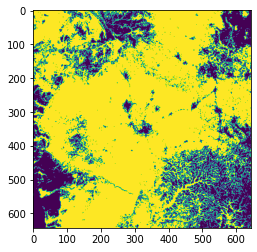

<AxesSubplot:>

In [ ]:
list_of_files = []
list_of_files.append(rasterio.open('/data/uganda/budongo/matt_hansen/2000.tif'))
mosaic, out_trans = merge(list_of_files)
out_meta = list_of_files[0].meta.copy()
out_meta.update({"driver": "GTiff", "height": mosaic.shape[1], "width": mosaic.shape[2], "transform": out_trans, "crs": "+proj=utm +zone=35 +ellps=GRS80 +units=m +no_defs "})
with rasterio.open('/data/uganda/budongo/matt_hansen/2000.tif', "w", **out_meta) as dest:
  dest.write(mosaic)
out_meta = rasterio.open('/data/uganda/budongo/matt_hansen/2000.tif').meta.copy()
mosaic = rasterio.open('/data/uganda/budongo/matt_hansen/2000.tif').read(1)
print(mosaic.shape)
show(mosaic)

In [ ]:
with rasterio.open('/data/uganda/budongo/matt_hansen/2000.tif') as src:
  geo_topleft_x, geo_topleft_y = rasterio.transform.xy(src.transform, 0, 0)
  geo_bottomright_x, geo_bottomright_y = rasterio.transform.xy(src.transform, 7168, 7168)

print(geo_topleft_x, geo_topleft_y, geo_bottomright_x, geo_bottomright_y)

31.3014096 3.8455352 52.805409600000004 -17.658464800000004


In [ ]:
with rasterio.open('data/targets_myanmar/forest_loss_mmr_GEE.tif') as src:
  loss = src.read(1, window=from_bounds(geo_topleft_x, geo_bottomright_y, geo_bottomright_x, geo_topleft_y, src.transform))

with rasterio.open('data/targets_myanmar/forest_gain_mmr_GEE.tif') as src:
  gain = src.read(1, window=from_bounds(geo_topleft_x, geo_bottomright_y, geo_bottomright_x, geo_topleft_y, src.transform))

loss = np.pad(loss, pad_width=((0, 13), (0, 2)), constant_values=((0, 0),))
gain = np.pad(gain, pad_width=((0, 13), (0, 2)), constant_values=((0, 0),))
print(loss.shape)
print(gain.shape)
print(mosaic.shape)
mosaic_thisyear = mosaic
for year in range(2000, 2020):
  loss_thisyear = np.zeros(loss.shape, dtype=np.uint8)
  indices = [tuple(x) for x in np.argwhere(loss == year-1970)]
  for i in indices:
    loss_thisyear[i] = 1
  gain_thisyear = np.zeros(gain.shape, dtype=np.uint8)
  indices = [tuple(x) for x in np.argwhere(gain == year-1970)]
  for i in indices:
    gain_thisyear[i] = 1
  forest_nextyear = mosaic_thisyear - loss_thisyear + gain_thisyear
  del loss_thisyear
  del gain_thisyear
  del mosaic_thisyear
  forest_nextyear = np.clip(forest_nextyear, 0, 1)
  out_meta = out_meta.copy()
  out_meta.update({"height": forest_nextyear.shape[0], "width": forest_nextyear.shape[1]})
  with rasterio.open('data/targets_myanmar/'+str(year+1)+'.tif', "w", **out_meta) as dest:
    dest.write(np.expand_dims(forest_nextyear, axis=0))
  mosaic_thisyear = forest_nextyear

1.0
0.0
0.00027329581124441963


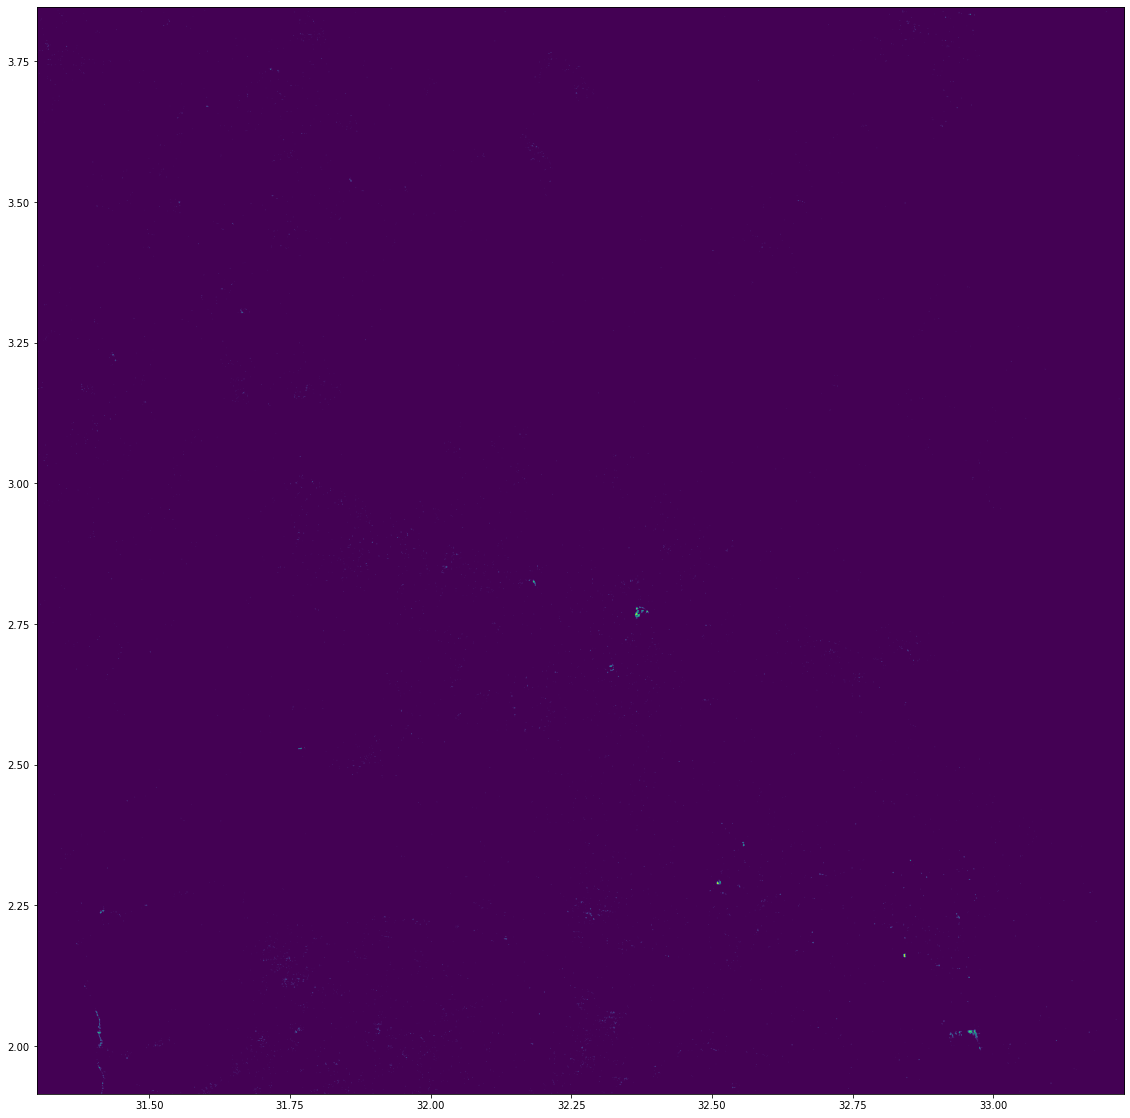

In [ ]:
df=gdal.Open("/data/uganda/budongo/matt_hansen_clipped.tif")
geotransform = df.GetGeoTransform()
projection = df.GetProjection()
band=df.GetRasterBand(3)
x_len=band.XSize
y_len=band.YSize
loss_year=band.ReadAsArray()
band=None
df=None

loss_year=loss_year.astype("float64")
driver = gdal.GetDriverByName('GTiff')
new_tiff = driver.Create("tmp.tif",x_len,y_len,1,gdal.GDT_Float64)
new_tiff.SetGeoTransform(geotransform)
new_tiff.SetProjection(projection)
new_tiff.GetRasterBand(1).WriteArray(loss_year)
new_tiff.FlushCache() #Saves to disk
new_tiff = None #closes the file

print(loss_year.max())
print(loss_year.min())
print(loss_year.mean())
visualiseRasterDataFromFile("tmp.tif")

In [ ]:
def visualiseRasterDataFromFile(path):
  plt.figure(figsize=(20,20))
  src = rasterio.open(path)
  show(src)

In [ ]:
#1 forest cover
#2 loss
# 3 gain
!pip freeze

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.0
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.28
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==

In [2]:
!python --version

Python 3.7.13
